<a href="https://colab.research.google.com/github/molly72/Project/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings. filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')

In [ ]:
!pip install Historic-Crypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from Historic_Crypto import HistoricalData

In [ ]:
btc_historicals = HistoricalData('BTC-USD',60,'2023-1-1-00-00', '2023-5-31-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2023-01-01T00:00:00
Provisional End: 2023-01-01T05:00:00
Data for chunk 1 of 721 extracted
Provisional Start: 2023-01-01T05:00:00
Provisional End: 2023-01-01T10:00:00
Data for chunk 2 of 721 extracted
Provisional Start: 2023-01-01T10:00:00
Provisional End: 2023-01-01T15:00:00
Data for chunk 3 of 721 extracted
Provisional Start: 2023-01-01T15:00:00
Provisional End: 2023-01-01T20:00:00
Data for chunk 4 of 721 extracted
Provisional Start: 2023-01-01T20:00:00
Provisional End: 2023-01-02T01:00:00
Data for chunk 5 of 721 extracted
Provisional Start: 2023-01-02T01:00:00
Provisional End: 2023-01-02T06:00:00
Data for chunk 6 of 721 extracted
Provisional Start: 2023-01-02T06:00:00
Provisional End: 2023-01-02T11:00:00
Data for chunk 7 of 

KeyboardInterrupt: ignored

In [ ]:
btc_historicals.head()

In [ ]:
btc_historicals.tail()

In [ ]:
btc_historicals.shape

In [ ]:
btc_historicals.to_csv('btc_data.csv', index=False)

In [ ]:
btc_historicals_saved_file = pd.read_csv('btc_data.csv')
btc_historicals_saved_file

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
btc_historicals.to_csv('btc_data.csv')
!cp btc_data.csv "drive/My Drive/ML"

NameError: ignored

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/ML/btc_data.csv')

In [ ]:
root_path = '/content/drive/MyDrive/ML/btc_data.csv'

btc_input_df = pd.read_csv(root_path)
btc_input_df.tail()

,time,low,high,open,close,volume
215660,2023-05-30 23:56:00,27692.11,27709.21,27693.55,27706.25,3.381525
215661,2023-05-30 23:57:00,27703.13,27709.20,27706.27,27705.96,1.663082
215662,2023-05-30 23:58:00,27701.20,27708.30,27708.28,27701.21,1.883806
215663,2023-05-30 23:59:00,27698.88,27706.12,27701.21,27700.15,1.465776
215664,2023-05-31 00:00:00,27693.98,27701.38,27700.68,27696.65,1.875330


In [ ]:
btc_input_df.shape

(215665, 6)

In [ ]:
btc_input_df.describe()

,low,high,open,close,volume
count,215665.000000,215665.000000,215665.000000,215665.000000,215665.000000
mean,24949.192344,24968.470986,24958.973037,24959.083639,11.996475
std,3642.230225,3645.649258,3644.021260,3643.991720,20.671580
min,16490.000000,16498.900000,16497.250000,16497.400000,0.000455
25%,22659.870000,22680.830000,22671.090000,22670.660000,2.549679
50%,25855.010000,25909.590000,25884.190000,25884.200000,5.887951
75%,27940.000000,27959.130000,27949.200000,27949.200000,13.520630
max,30972.850000,31050.000000,30998.100000,30998.100000,751.652422


In [ ]:
btc_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215665 entries, 0 to 215664
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    215665 non-null  object 
 1   low     215665 non-null  float64
 2   high    215665 non-null  float64
 3   open    215665 non-null  float64
 4   close   215665 non-null  float64
 5   volume  215665 non-null  float64
dtypes: float64(5), object(1)
memory usage: 9.9+ MB


In [ ]:
btc_input_df_datetype = btc_input_df.astype({'time': 'datetime64'})

In [ ]:
btc_input_df_datetype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215665 entries, 0 to 215664
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    215665 non-null  datetime64[ns]
 1   low     215665 non-null  float64       
 2   high    215665 non-null  float64       
 3   open    215665 non-null  float64       
 4   close   215665 non-null  float64       
 5   volume  215665 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 9.9 MB


In [ ]:
print('Null Values:',btc_input_df_datetype.isnull().values.sum())

Null Values: 0


In [ ]:
print('If any NA values:', btc_input_df_datetype.isnull().values.any())

If any NA values: False


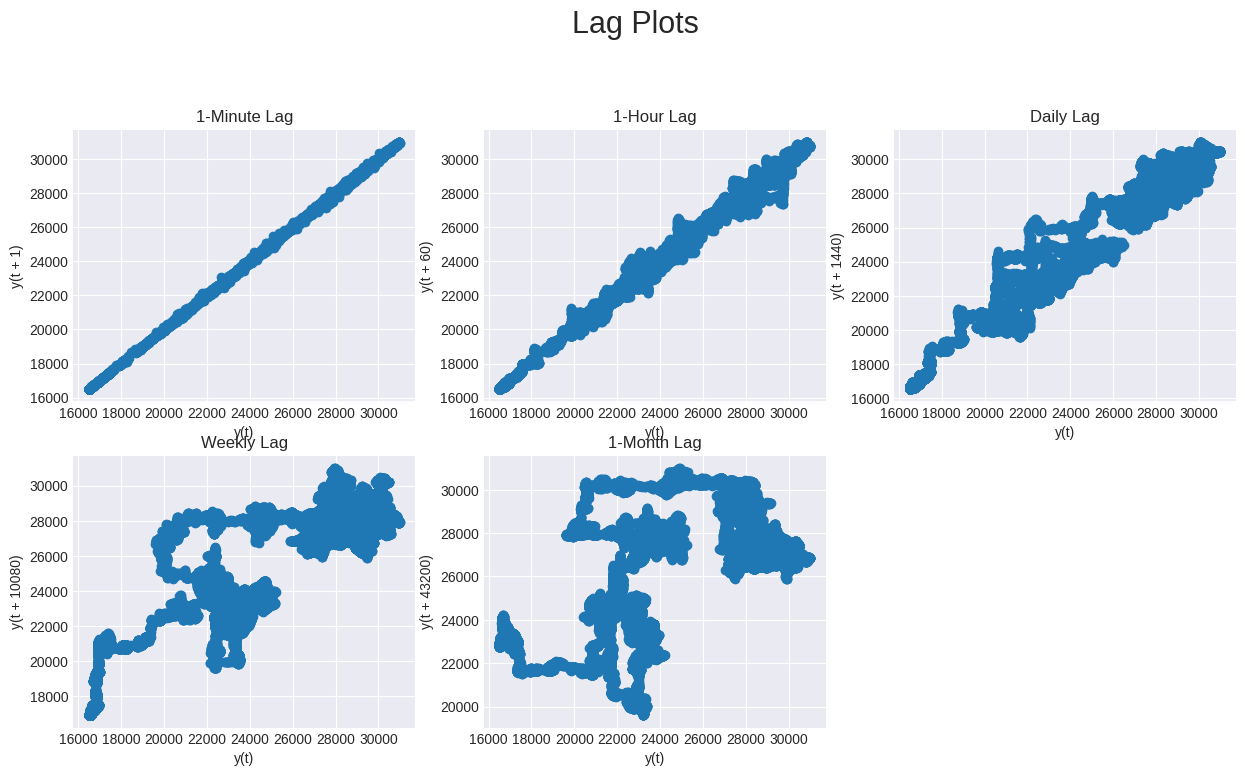

In [ ]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(btc_input_df_datetype['close'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(btc_input_df_datetype['close'], lag=60) #hourley lag
plt.title('1-Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(btc_input_df_datetype['close'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(btc_input_df_datetype['close'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(btc_input_df_datetype['close'], lag=43200) #month lag
plt.title('1-Month Lag')

plt.show()

In [ ]:

btc_input_df_datetype['date'] = pd.to_datetime(btc_input_df_datetype['time'],unit='s').dt.date

display(btc_input_df_datetype.head())

,time,low,high,open,close,volume,date
0,2023-01-01 00:01:00,16527.14,16532.69,16531.00,16529.38,5.961638,2023-01-01
1,2023-01-01 00:02:00,16525.01,16531.04,16528.94,16527.07,23.837786,2023-01-01
2,2023-01-01 00:03:00,16520.14,16527.07,16525.82,16522.65,15.802923,2023-01-01
3,2023-01-01 00:04:00,16516.41,16524.33,16521.81,16523.48,18.666408,2023-01-01
4,2023-01-01 00:05:00,16521.96,16524.50,16522.32,16524.50,10.900185,2023-01-01


In [ ]:
btc_input_df_datetype.shape

(215665, 7)

In [ ]:
group = btc_input_df_datetype.groupby('date')

btc_closing_price_groupby_date = group['close'].mean()

In [ ]:
btc_closing_price_groupby_date.head()

date
2023-01-01    16548.625476
2023-01-02    16682.760069
2023-01-03    16683.928569
2023-01-04    16823.720674
2023-01-05    16826.772507
Name: close, dtype: float64

In [ ]:
btc_closing_price_groupby_date.shape

(151,)

In [ ]:
prediction_days = 45

df_train= btc_closing_price_groupby_date[:len(btc_closing_price_groupby_date)-prediction_days].values.reshape(-1,1)

df_test= btc_closing_price_groupby_date[len(btc_closing_price_groupby_date)-prediction_days:].values.reshape(-1,1)

In [ ]:
df_train.shape

(106, 1)

In [ ]:
df_test.shape

(45, 1)

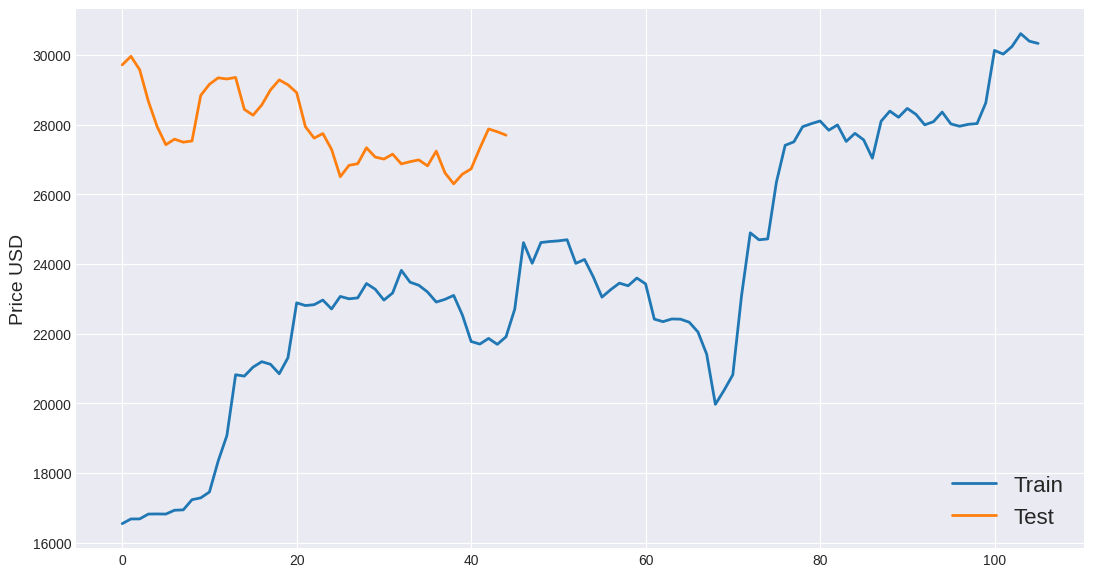

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(df_train, label='Train', linewidth=2)
ax.plot(df_test, label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [ ]:
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

In [ ]:
scaled_train

array([[0.        ],
       [0.00953874],
       [0.00962183],
       [0.0195629 ],
       [0.01977992],
       [0.01954813],
       [0.02734009],
       [0.02810453],
       [0.04885934],
       [0.05255658],
       [0.06455737],
       [0.12766647],
       [0.17979078],
       [0.30388672],
       [0.30106984],
       [0.31944098],
       [0.33047068],
       [0.32523903],
       [0.30589286],
       [0.33853389],
       [0.4506139 ],
       [0.44507535],
       [0.44683389],
       [0.45628387],
       [0.43810633],
       [0.46372813],
       [0.45881773],
       [0.4607144 ],
       [0.49004424],
       [0.47845832],
       [0.45622225],
       [0.47070228],
       [0.51692013],
       [0.49275948],
       [0.48651307],
       [0.47279759],
       [0.45218696],
       [0.45773508],
       [0.46577875],
       [0.42557188],
       [0.3717043 ],
       [0.36648946],
       [0.37801774],
       [0.36590718],
       [0.38135666],
       [0.43777263],
       [0.57350776],
       [0.531

In [ ]:
scaled_test

array([[0.93278873],
       [1.        ],
       [0.89511624],
       [0.64742505],
       [0.44962382],
       [0.30712284],
       [0.350271  ],
       [0.32681827],
       [0.33608621],
       [0.69353326],
       [0.7807327 ],
       [0.83123463],
       [0.82228638],
       [0.83422056],
       [0.58374823],
       [0.53846016],
       [0.61869295],
       [0.73662548],
       [0.81512226],
       [0.7767584 ],
       [0.71503476],
       [0.4485802 ],
       [0.35868307],
       [0.39444639],
       [0.27046959],
       [0.05596733],
       [0.14512918],
       [0.15801392],
       [0.28277357],
       [0.21036449],
       [0.1940403 ],
       [0.23312794],
       [0.15618252],
       [0.17389196],
       [0.18764698],
       [0.14113072],
       [0.25671242],
       [0.08637441],
       [0.        ],
       [0.07616845],
       [0.1174388 ],
       [0.27950543],
       [0.43043966],
       [0.40874061],
       [0.3816008 ]])

In [ ]:
def dataset_generator_lstm(dataset, look_back=5):
    # A “lookback period” defines the window-size of how many
    # previous timesteps are used in order to predict
    # the subsequent timestep.
    dataX, dataY = [], []

    for i in range(len(dataset) - look_back):
        window_size_x = dataset[i:(i + look_back), 0]

        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back, 0]) # this is the label or actual y-value
    return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(scaled_train)

testX, testY = dataset_generator_lstm(scaled_test)

In [ ]:
# print("trainX: ", trainX)
print("trainY: ", trainY)
# print("testX: ", testX)
# print("testY", testY)

trainY:  [0.01954813 0.02734009 0.02810453 0.04885934 0.05255658 0.06455737
 0.12766647 0.17979078 0.30388672 0.30106984 0.31944098 0.33047068
 0.32523903 0.30589286 0.33853389 0.4506139  0.44507535 0.44683389
 0.45628387 0.43810633 0.46372813 0.45881773 0.4607144  0.49004424
 0.47845832 0.45622225 0.47070228 0.51692013 0.49275948 0.48651307
 0.47279759 0.45218696 0.45773508 0.46577875 0.42557188 0.3717043
 0.36648946 0.37801774 0.36590718 0.38135666 0.43777263 0.57350776
 0.5312223  0.57373912 0.57572042 0.57707452 0.57934658 0.53113107
 0.53912101 0.50370255 0.46226457 0.47751697 0.49079598 0.48545803
 0.50114303 0.48932954 0.41736731 0.41222331 0.41769961 0.41730436
 0.41111212 0.391284   0.34594754 0.24345348 0.27223391 0.30379973
 0.46526649 0.59352065 0.57926879 0.58108244 0.6971516  0.77207698
 0.77919412 0.81000498 0.81624964 0.82176824 0.80292152 0.81371851
 0.78003312 0.79648151 0.7832266  0.74580826 0.82124382 0.84191313
 0.82929088 0.84739532 0.83522176 0.81387579 0.8202914

In [ ]:
print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY", testY.shape)

trainX:  (101, 5)
trainY:  (101,)
testX:  (40, 5)
testY (40,)


In [ ]:
print("trainX: ", trainX)
print("trainY: ", trainY)
print("testX: ", testX)
print("testY", testY)

trainX:  [[0.         0.00953874 0.00962183 0.0195629  0.01977992]
 [0.00953874 0.00962183 0.0195629  0.01977992 0.01954813]
 [0.00962183 0.0195629  0.01977992 0.01954813 0.02734009]
 [0.0195629  0.01977992 0.01954813 0.02734009 0.02810453]
 [0.01977992 0.01954813 0.02734009 0.02810453 0.04885934]
 [0.01954813 0.02734009 0.02810453 0.04885934 0.05255658]
 [0.02734009 0.02810453 0.04885934 0.05255658 0.06455737]
 [0.02810453 0.04885934 0.05255658 0.06455737 0.12766647]
 [0.04885934 0.05255658 0.06455737 0.12766647 0.17979078]
 [0.05255658 0.06455737 0.12766647 0.17979078 0.30388672]
 [0.06455737 0.12766647 0.17979078 0.30388672 0.30106984]
 [0.12766647 0.17979078 0.30388672 0.30106984 0.31944098]
 [0.17979078 0.30388672 0.30106984 0.31944098 0.33047068]
 [0.30388672 0.30106984 0.31944098 0.33047068 0.32523903]
 [0.30106984 0.31944098 0.33047068 0.32523903 0.30589286]
 [0.31944098 0.33047068 0.32523903 0.30589286 0.33853389]
 [0.33047068 0.32523903 0.30589286 0.33853389 0.4506139 ]
 [0.3

In [ ]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
data = data.reshape((1, 10, 1))
print(data.shape)

(1, 10, 1)


In [ ]:
data

array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ]]])

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(10, 1)))
model.add(Dense(1))

In [ ]:
print(trainX.shape)
print(testX.shape)

(101, 5)
(40, 5)


In [ ]:
trainX.shape[0]

101

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (101, 5, 1)
Shape of testX:  (40, 5, 1)


In [ ]:
trainX

array([[[0.        ],
        [0.00953874],
        [0.00962183],
        [0.0195629 ],
        [0.01977992]],

       [[0.00953874],
        [0.00962183],
        [0.0195629 ],
        [0.01977992],
        [0.01954813]],

       [[0.00962183],
        [0.0195629 ],
        [0.01977992],
        [0.01954813],
        [0.02734009]],

       [[0.0195629 ],
        [0.01977992],
        [0.01954813],
        [0.02734009],
        [0.02810453]],

       [[0.01977992],
        [0.01954813],
        [0.02734009],
        [0.02810453],
        [0.04885934]],

       [[0.01954813],
        [0.02734009],
        [0.02810453],
        [0.04885934],
        [0.05255658]],

       [[0.02734009],
        [0.02810453],
        [0.04885934],
        [0.05255658],
        [0.06455737]],

       [[0.02810453],
        [0.04885934],
        [0.05255658],
        [0.06455737],
        [0.12766647]],

       [[0.04885934],
        [0.05255658],
        [0.06455737],
        [0.12766647],
        [0.17979

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# You must set return_sequences=True when stacking LSTM layers so that the second LSTM layer
# has a compatible n-dimensional sequence input.
# This hyper parameter should be set to False (which is the default value) for the last layer
# and true for the other previous layers.

regressor.add(LSTM(units = 128, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
# regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))
# Note - If I plan to add 3-rd or 4-th layers of LSTM then
# I must set return_sequences=True in the 2-nd layer above
# so that the 3-rd LSTM layer has a compatible n-dimensional sequence input.


# Adding a third LSTM layer and some Dropout regularisation
# regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (trainX.shape[1], trainX.shape[2])))
# regressor.add(Dropout(0.2))


# Adding a fourth LSTM layer and some Dropout regularisation
# regressor.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
# regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

regressor.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 5, 128)            66560     
                                                                 
 dropout_4 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compiling the LSTM
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

checkpoint_path = 'my_best_model.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')


earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]


history = regressor.fit(trainX, trainY, batch_size = 32, epochs = 300, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

Epoch 1/300
1/4 [======>.......................] - ETA: 9s - loss: 0.1390
Epoch 1: val_loss improved from inf to 0.14511, saving model to my_best_model.hdf5
4/4 [==============================] - 4s 238ms/step - loss: 0.2981 - val_loss: 0.1451
Epoch 2/300
4/4 [==============================] - ETA: 0s - loss: 0.1996
Epoch 2: val_loss improved from 0.14511 to 0.09091, saving model to my_best_model.hdf5
4/4 [==============================] - 0s 43ms/step - loss: 0.1996 - val_loss: 0.0909
Epoch 3/300
1/4 [======>.......................] - ETA: 0s - loss: 0.0504
Epoch 3: val_loss improved from 0.09091 to 0.05064, saving model to my_best_model.hdf5
4/4 [==============================] - 0s 31ms/step - loss: 0.1109 - val_loss: 0.0506
Epoch 4/300
1/4 [======>.......................] - ETA: 0s - loss: 0.0157
Epoch 4: val_loss did not improve from 0.05064
4/4 [==============================] - 0s 23ms/step - loss: 0.0299 - val_loss: 0.0547
Epoch 5/300
1/4 [======>.......................] - ETA:

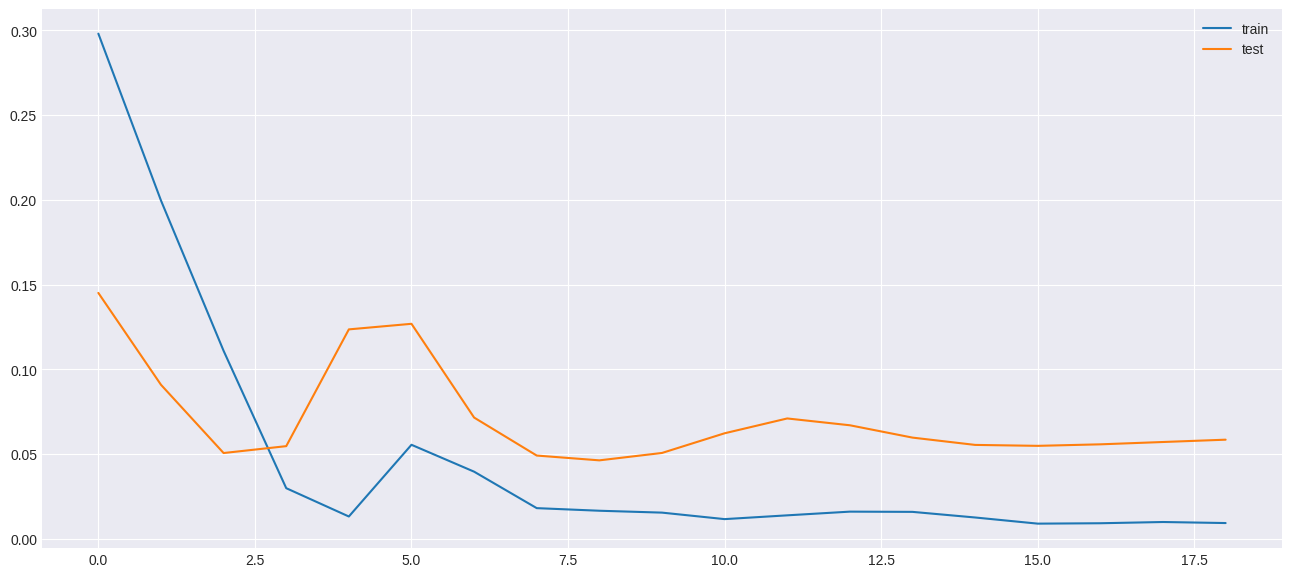

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# predicted_btc_price_test_data = regressor.predict(testX)

from tensorflow.keras.models import load_model

model_from_saved_checkpoint = load_model(checkpoint_path)

predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)

predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))

test_actual = scaler_test.inverse_transform(testY.reshape(-1, 1))

2/2 [==============================] - 1s 7ms/step


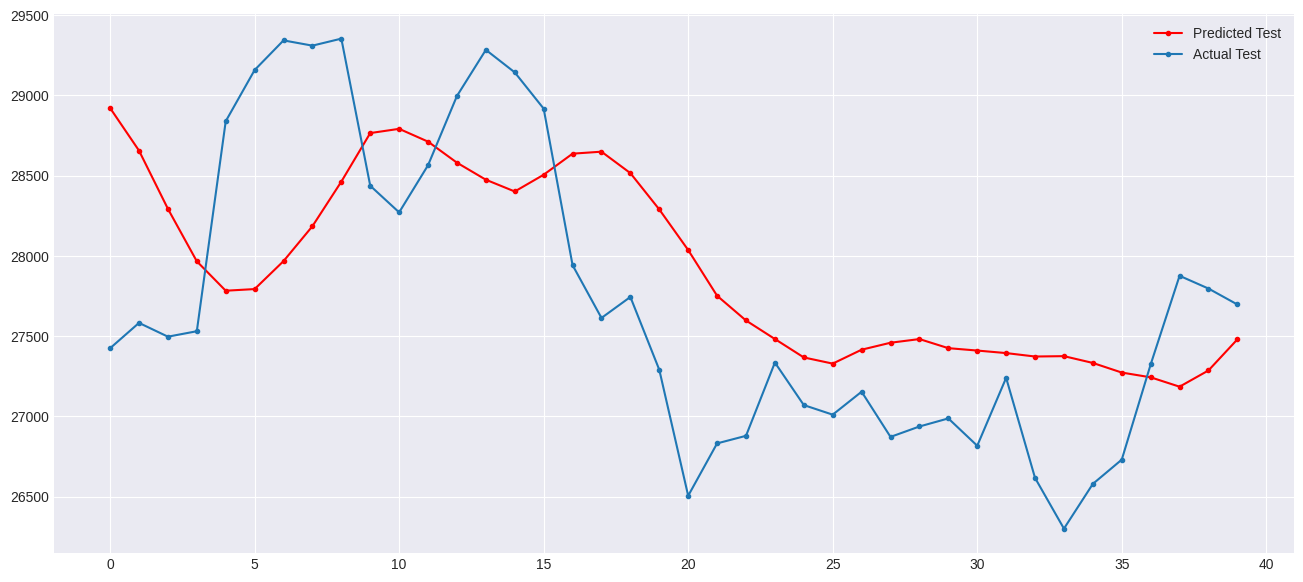

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()
plt.show()

In [ ]:
predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)

predicted_btc_price_train_data = scaler_train.inverse_transform(predicted_btc_price_train_data.reshape(-1, 1))

train_actual = scaler_train.inverse_transform(trainY.reshape(-1, 1))

4/4 [==============================] - 0s 5ms/step


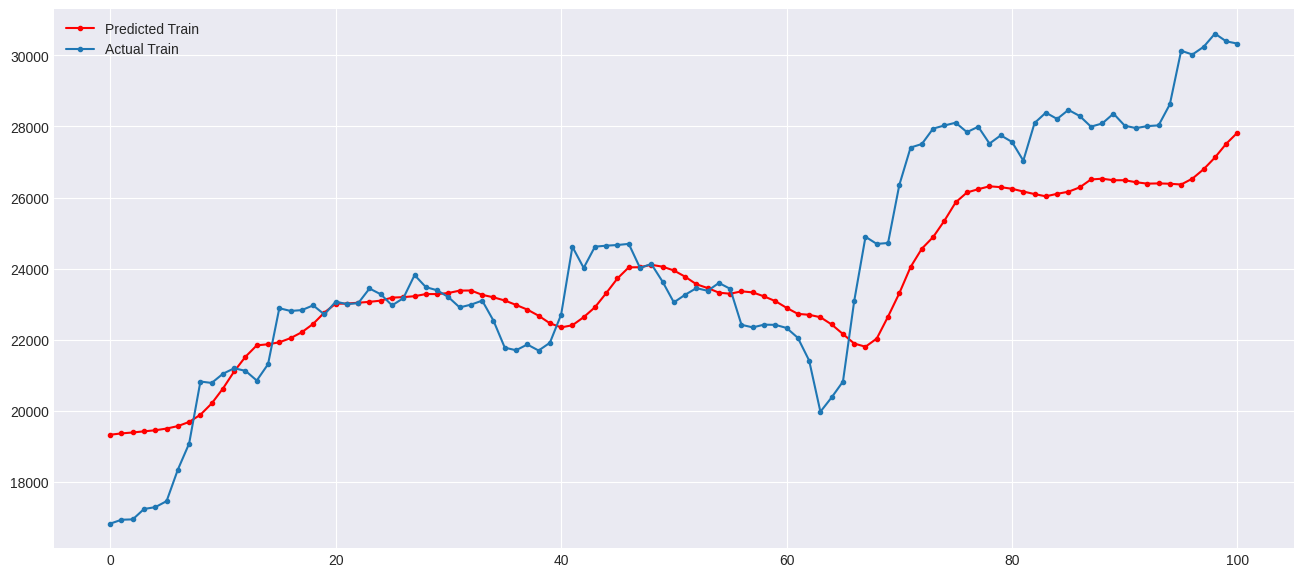

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Train')

plt.plot(train_actual, marker='.', label='Actual Train')

plt.legend()
plt.show()

In [ ]:
rmse_lstm_test = math.sqrt(mean_squared_error(test_actual, predicted_btc_price_test_data))

print('Test RMSE: %.3f' % rmse_lstm_test)

Test RMSE: 27734.257


In [ ]:
rmse_lstm_train = math.sqrt(mean_squared_error(train_actual, predicted_btc_price_train_data))

print('Test RMSE: %.3f' % rmse_lstm_train)

Test RMSE: 24320.823


In [ ]:
testX
testX.shape

(40, 5, 1)

In [ ]:
lookback_period = 5

testX_last_5_days = testX[testX.shape[0] - lookback_period : ]

testX_last_5_days.shape

(5, 5, 1)

In [ ]:
testX_last_5_days

array([[[0.14113072],
        [0.25671242],
        [0.08637441],
        [0.        ],
        [0.07616845]],

       [[0.25671242],
        [0.08637441],
        [0.        ],
        [0.07616845],
        [0.1174388 ]],

       [[0.08637441],
        [0.        ],
        [0.07616845],
        [0.1174388 ],
        [0.27950543]],

       [[0.        ],
        [0.07616845],
        [0.1174388 ],
        [0.27950543],
        [0.43043966]],

       [[0.07616845],
        [0.1174388 ],
        [0.27950543],
        [0.43043966],
        [0.40874061]]])

In [ ]:
predicted_5_days_forecast_price_test_x = []

for i in range(5):
  predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_5_days[i:i+1])

  predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1, 1))

  predicted_5_days_forecast_price_test_x.append(predicted_forecast_price_test_x)

  print("Forecast for the next 5 Days Beyond the actual trading days", np.array(predicted_5_days_forecast_price_test_x))

1/1 [==============================] - 0s 22ms/step
Forecast for the next 5 Days Beyond the actual trading days [[[27272.555]]]
1/1 [==============================] - 0s 21ms/step
Forecast for the next 5 Days Beyond the actual trading days [[[27272.555]]

 [[27242.86 ]]]
1/1 [==============================] - 0s 24ms/step
Forecast for the next 5 Days Beyond the actual trading days [[[27272.555]]

 [[27242.86 ]]

 [[27184.465]]]
1/1 [==============================] - 0s 21ms/step
Forecast for the next 5 Days Beyond the actual trading days [[[27272.555]]

 [[27242.86 ]]

 [[27184.465]]

 [[27285.686]]]
1/1 [==============================] - 0s 28ms/step
Forecast for the next 5 Days Beyond the actual trading days [[[27272.555]]

 [[27242.86 ]]

 [[27184.465]]

 [[27285.686]]

 [[27479.281]]]


In [ ]:
predicted_5_days_forecast_price_test_x = np.array(predicted_5_days_forecast_price_test_x)

predicted_5_days_forecast_price_test_x.shape

(5, 1, 1)

In [ ]:
predicted_btc_price_test_data.shape

(40, 1)

In [ ]:
predicted_btc_price_test_data

array([[0.71607995],
       [0.64359593],
       [0.54448384],
       [0.455144  ],
       [0.40506464],
       [0.4078475 ],
       [0.45547077],
       [0.51490986],
       [0.5907914 ],
       [0.6734506 ],
       [0.68065864],
       [0.6588628 ],
       [0.62302005],
       [0.59403133],
       [0.5739913 ],
       [0.60250866],
       [0.6383745 ],
       [0.6417756 ],
       [0.6052496 ],
       [0.54343665],
       [0.47430298],
       [0.3964677 ],
       [0.3543585 ],
       [0.32283047],
       [0.29146606],
       [0.2809501 ],
       [0.30463588],
       [0.31649828],
       [0.32273656],
       [0.30725634],
       [0.30319256],
       [0.2988823 ],
       [0.29303777],
       [0.29366723],
       [0.28208154],
       [0.2657309 ],
       [0.25761777],
       [0.24166308],
       [0.2693182 ],
       [0.32221204]], dtype=float32)

In [ ]:
predicted_5_days_forecast_price_test_x

array([[[27272.555]],

       [[27242.86 ]],

       [[27184.465]],

       [[27285.686]],

       [[27479.281]]], dtype=float32)

In [ ]:
predicted_5_days_forecast_price_test_x = predicted_5_days_forecast_price_test_x.flatten()

predicted_5_days_forecast_price_test_x

array([27272.555, 27242.86 , 27184.465, 27285.686, 27479.281],
      dtype=float32)

In [ ]:
predicted_btc_price_test_data = predicted_btc_price_test_data.flatten()

predicted_btc_price_test_data

array([28920.879, 28655.58 , 28292.82 , 27965.826, 27782.531, 27792.717,
       27967.021, 28184.576, 28462.31 , 28764.852, 28791.232, 28711.459,
       28580.27 , 28474.168, 28400.818, 28505.197, 28636.469, 28648.916,
       28515.229, 28288.986, 28035.95 , 27751.064, 27596.94 , 27481.545,
       27366.748, 27328.258, 27414.95 , 27458.367, 27481.201, 27424.543,
       27409.668, 27393.89 , 27372.5  , 27374.803, 27332.398, 27272.553,
       27242.86 , 27184.465, 27285.686, 27479.281], dtype=float32)

In [ ]:
predicted_btc_test_concatenated = np.concatenate((predicted_btc_price_test_data, predicted_5_days_forecast_price_test_x))

predicted_btc_test_concatenated

predicted_btc_test_concatenated.shape

(45,)

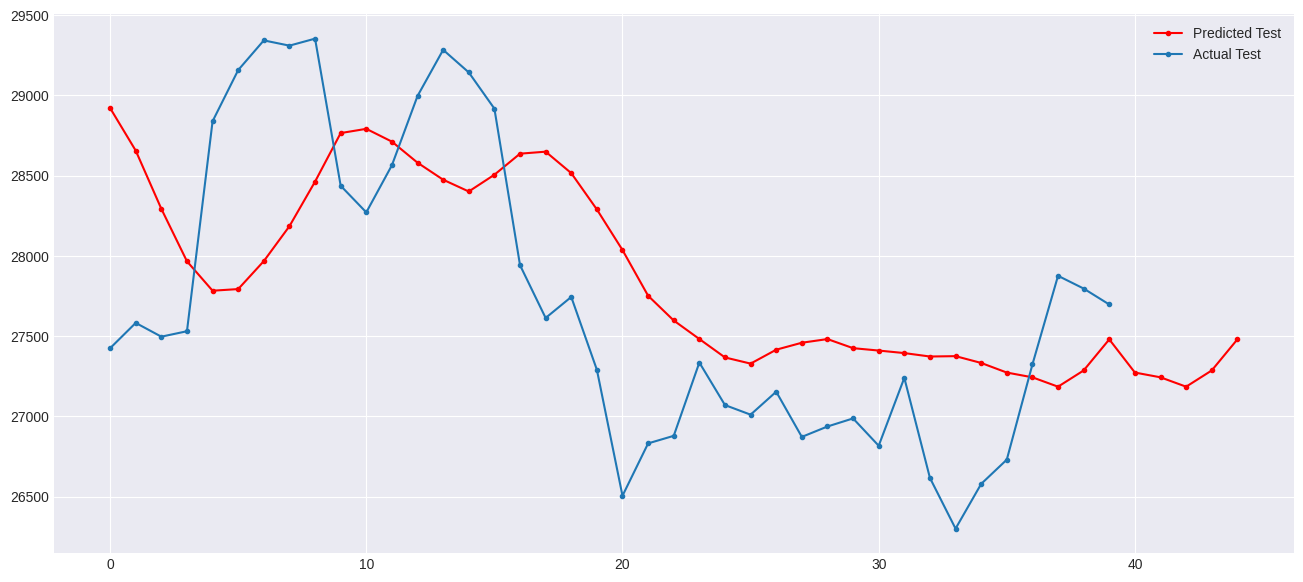

In [ ]:
plt.figure(figsize=(16,7))

plt.plot(predicted_btc_test_concatenated, 'r', marker='.', label='Predicted Test')

plt.plot(test_actual, marker='.', label='Actual Test')

plt.legend()
plt.show()

<Axes: title={'center': 'Bitcoin Weighted Price'}, xlabel='time'>

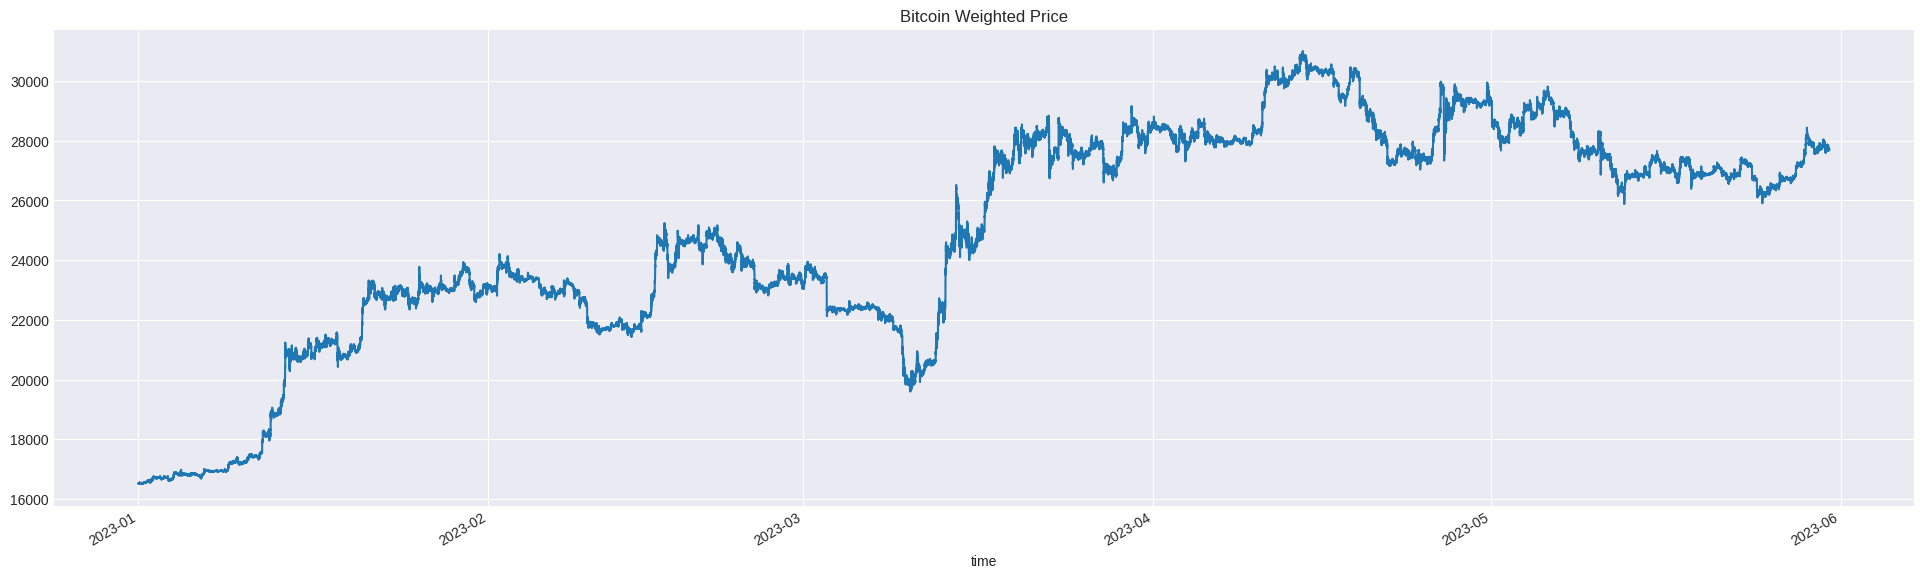

In [ ]:
btc_input_df_datetype.set_index("time").close.plot(figsize=(24,7), title="Bitcoin Weighted Price")